In [14]:
import pandas as pd
import numpy as np
dataset = pandas.read_csv('C:/Users/可爱的小鱼/Desktop/customers.csv')
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [29]:
#描述性统计
X = dataset.iloc[:, [3, 4]]
pd.DataFrame(X.describe())  

,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000
mean,60.560000,50.200000
std,26.264721,25.823522
min,15.000000,1.000000
25%,41.500000,34.750000
50%,61.500000,50.000000
75%,78.000000,73.000000
max,137.000000,99.000000


<function matplotlib.pyplot.show(*args, **kw)>

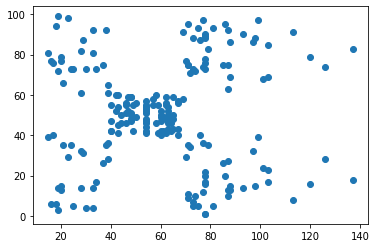

In [48]:
#数据可视化部分
import matplotlib.pyplot as plt
X1=X.iloc[:,0]
X2=X.iloc[:,-1]
y = range(10,137,30)
#y =[10, 40, 70, 100, 130,160]
plt.scatter(X1,X2)
plt.show

In [11]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

In [16]:
#y_hc

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int64)

In [10]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

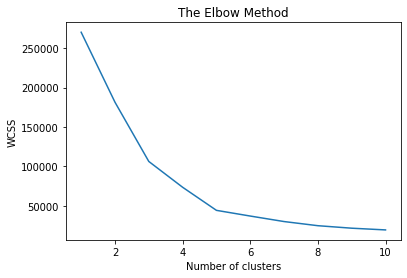

In [18]:
import matplotlib.pyplot as plt
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [21]:
# ward

from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

# ward
ward = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_ward = ward.fit_predict(X)


In [22]:
from sklearn import metrics
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, y_ward))

Silhouette Coefficient: 0.553


In [25]:
import matplotlib.pyplot as plt
sil = []
for i in range(2, 11):
    ward = AgglomerativeClustering(n_clusters = i, affinity = 'euclidean', linkage = 'ward')
    y_ward = ward.fit_predict(X)
    sil.append(metrics.silhouette_score(X, y_ward))


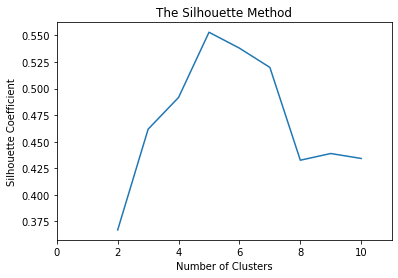

In [27]:
#sil
plt.plot(range(2, 11), sil)
plt.xlim([0,11])
plt.title('The Silhouette Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Coefficient')
plt.show()

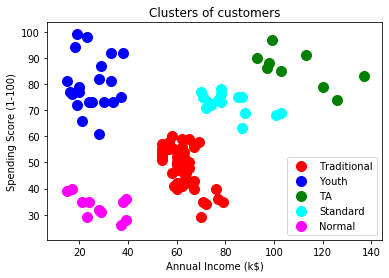

In [37]:
plt.scatter(X[y_ward  == 0, 0], X[y_ward  == 0, 1], s = 100, c = 'red', label = 'Traditional')
plt.scatter(X[y_ward  == 1, 0], X[y_ward  == 1, 1], s = 100, c = 'blue', label = 'Youth')
plt.scatter(X[y_ward  == 2, 0], X[y_ward  == 2, 1], s = 100, c = 'green', label = 'TA')
plt.scatter(X[y_ward  == 3, 0], X[y_ward  == 3, 1], s = 100, c = 'cyan', label = 'Standard')
plt.scatter(X[y_ward  == 4, 0], X[y_ward  == 4, 1], s = 100, c = 'magenta', label = 'Normal')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()